In [1]:
import os
import pandas as pd

# 出馬表データ
syutsuba_path = './data/sample1.csv'
df_syutsuba = pd.read_csv(syutsuba_path, encoding='shift-jis')
df_syutsuba = df_syutsuba[['レースID', '本賞金', '騎手名']]

# 成績データ
seiseki_path = './data/sample2.csv'
df_seiseki = pd.read_csv(seiseki_path, encoding='shift-jis')
df_seiseki = df_seiseki[['レースID', '確定着順']]

# 出馬表データと成績データをマージ
df = pd.merge(df_syutsuba, df_seiseki, on = 'レースID')

# 欠損値があるレコードは除去
df.dropna(how='any', inplace=True)

# 着順が3着以内かどうかのカラムを追加する
f_ranking = lambda x: 1 if x in [1, 2, 3] else 0
df['3着以内'] = df['確定着順'].map(f_ranking)

# ダミー変数を生成
df = pd.get_dummies(df, columns=['騎手名'])

# インデックスを設定（レースだけを特定する場合は、16バイト目までを使用）
df['race_index'] = df['レースID'].astype(str).str[0:16]
df.set_index('race_index', inplace=True)

# 不要なカラムを削除
df.drop(['レースID', '確定着順'], axis=1, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/sample1.csv'

In [ ]:
from sklearn.model_selection import train_test_split

# 説明変数をdataXに格納
dataX = df.drop(['3着以内'], axis=1, )

# 目的変数をdataYに格納
dataY = df['3着以内']

# データの分割を行う（学習用データ 0.8 評価用データ 0.2）
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY)

# 分類器を作成（ロジスティック回帰）
clf = LogisticRegression()

# 学習
clf.fit(X_train, y_train)

In [4]:
import os
import pandas as pd

# 出馬表データ
syutsuba_path = './data/sample1.csv'
df_syutsuba = pd.read_csv(syutsuba_path, encoding='shift-jis')
df_syutsuba = df_syutsuba[['日付', '寝た時刻']]

# 成績データ
seiseki_path = './data/sample2.csv'
df_seiseki = pd.read_csv(seiseki_path, encoding='shift-jis')
df_seiseki = df_seiseki[['日付', '確定起床時刻']]

#　出馬表データと成績データをマージ
df = pd.merge(df_syutsuba, df_seiseki, on = '日付')

# 欠損値があるレコードは除去
df.dropna(how='any', inplace=True)

#一応ここまでやった

# 着順が3着以内かどうかのカラムを追加する
#f_ranking = lambda x: 1 if x in [1, 2, 3] else 0
#df['いつ起きてる'] = df['確定起床時間'].map(f_ranking)

# ダミー変数を生成
#df = pd.get_dummies(df, columns=['騎手名'])

# インデックスを設定（レースだけを特定する場合は、16バイト目までを使用）
#df['race_index'] = df['日付'].astype(str).str[0:16]
#df.set_index('race_index', inplace=True)

# 不要なカラムを削除
#df.drop(['日付', '確定着順'], axis=1, inplace=True)


KeyboardInterrupt



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['寝た時刻'], df['確定起床時刻']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Keiichiro Ha Saikyo')    # 図のタイトル
plt.xlabel('寝た時刻') # x軸のラベル
plt.ylabel('確定起床時刻')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show() 

In [6]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names) # 説明変数(boston.data)をDataFrameに保存
boston_df['MEDV'] = boston.target # 目的変数(boston.target)もDataFrameに追加
boston_df.head()

/home/subar/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datase

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


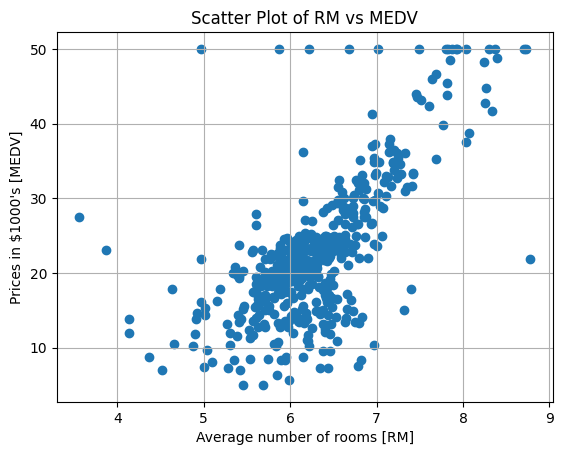

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(boston_df['RM'], boston_df['MEDV']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Scatter Plot of RM vs MEDV')    # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = boston_df[['RM']].values         # 説明変数（Numpyの配列）
Y = boston_df['MEDV'].values         # 目的変数（Numpyの配列）

lr.fit(X, Y)                         # 線形モデルの重みを学習

LinearRegression()